# Oblig 1

Oppgave 1.

Vi skal se på to uniformt fordelte ringladninger med radius $a=2$ og ladning $q_1=2$ og $q_2=-2$. Ringladningene er plassert som vist på tegningen under.

Oppgave 2.

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def findEfield(r, qi, ri):
    '''Funksjonen regner ut det elektriske feltet i ett punkt'''
    Ri = r - ri
    Ri_norm = np.linalg.norm(Ri)
    return qi*Ri/Ri_norm**3

In [62]:
a = 2. # radius til ringladningene
N = 20 # løsningspunkter
q1 = 2. # ladning på ring 1
q2 = -2. # ladning på ring 2

In [63]:
L = 4
NL = 40 
y = np.linspace(-L, L, NL)
z = np.linspace(-L, L, NL)
ry, rz = np.meshgrid(y, z)

In [64]:
Ey = np.zeros((NL,NL), float)
Ez = np.zeros_like(Ey)

In [65]:
for i in range(len(ry.flat)):
    '''Løper gjennom alle punkter i xz-planet for den ene ringladningen'''
    r = np.array([0, ry.flat[i], rz.flat[i]]) # lager r-vektor til hvert krysspunkt i griddet
    for j in range(N):
        theta = 2*np.pi/N*j # theta_i = [0,...,2pi]/N, delta_theta = 2pi/N
        rj = np.array([a*np.cos(theta),a*np.sin(theta),-1])
        R = r - rj
        dq = q1/N
        dE = findEfield(r,dq,rj)
        Ey.flat[i] += dE[1]
        Ez.flat[i] += dE[2]
    

In [66]:
for i in range(len(ry.flat)):
    '''Løper gjennom alle punkter i xz-planet for den andre ringladningen'''
    r = np.array([0, ry.flat[i], rz.flat[i]]) # lager r-vektor til hvert krysspunkt i griddet
    for j in range(N):
        theta = 2*np.pi/N*j # theta_i = [0,...,2pi]/N, delta_theta = 2pi/N
        rj = np.array([a*np.cos(theta),a*np.sin(theta),1])
        R = r - rj
        dq = q2/N
        dE = findEfield(r,dq,rj)
        Ey.flat[i] += dE[1]
        Ez.flat[i] += dE[2]

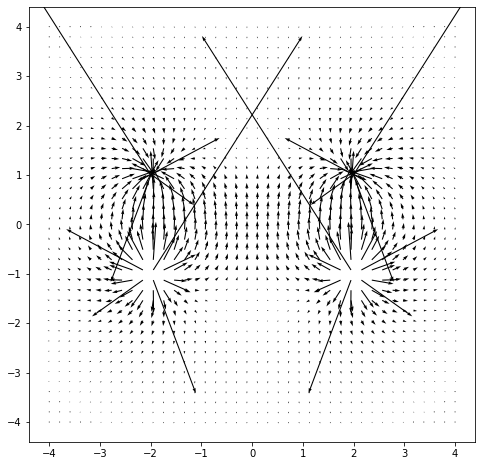

In [67]:
plt.figure(figsize=(8,8))
plt.quiver(ry, rz, Ey, Ez)